In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
data=pd.read_csv('./guazi.csv',header=None,
                names= [ 'name', 's_price', 'price', 'buy_time', 'km',
                      'oil', 'type','problem','city'])
data


,name,s_price,price,buy_time,km,oil,type,problem,city
0,奔驰GLB 2020款 GLB 200 动感型,34.17万,28.18,2020年,1.39万公里,1.3T,自动,"['2处异常', '3处异常', '3处异常', '3处异常', '1处异常', '2处异常']",beijing
1,路虎 发现神行 2016款 2.0T S,39.95万,19.50,2016年,7.02万公里,2.0T,自动,"['1处异常', '2处异常', '2处异常', '9处异常', '1处异常', '1处异常...",beijing
2,斯柯达 晶锐 2012款 1.6L Scout,12.58万,3.80,2012年,5.62万公里,1.6L,自动,"['2处异常', '1处异常', '6处异常', '2处异常', '8处异常', '2处异常']",beijing
3,荣威i6 2017款 20T 自动旗舰版,12.68万,5.70,2017年,5.34万公里,1.5T,自动,"['3处异常', '4处异常', '1处异常', '7处异常', '7处异常', '2处异常...",beijing
4,丰田 YARiS L 致炫 2016款 改款 1.5E CVT魅动版,9.31万,7.38,2018年,1.94万公里,1.5L,自动,"['1处异常', '4处异常', '2处异常', '2处异常', '2处异常']",beijing
...,...,...,...,...,...,...,...,...,...
19315,奔驰CLA级 2015款 CLA 200(进口),31.04万,17.28,2015年,4.72万公里,1.6T,自动,"['1处异常', '5处异常', '3处异常', '2处异常']",wuhan
19316,标致408 2014款 1.8L 自动豪华版,16.25万,6.27,2015年,7.08万公里,1.8L,自动,"['4处异常', '1处异常']",wuhan
19317,哈弗M6 2017款 1.5T 自动两驱精英型,11.38万,6.78,2018年,3.77万公里,1.5T,自动,"['2处异常', '2处异常', '1处异常', '5处异常', '4处异常', '1处异常...",wuhan
19318,雪佛兰 科鲁兹 2013款 1.8L SX AT,16.63万,5.28,2013年,11.29万公里,1.8L,自动,"['1处异常', '2处异常', '1处异常', '1处异常', '5处异常', '6处异常...",wuhan


### 数据预处理

In [196]:
def func(item):
    return item.split(' ')[0]
data['brand']=data['name'].astype(str).apply(func)
data.head(5)

,name,s_price,price,buy_time,km,oil,type,problem,city,brand
0,奔驰GLB 2020款 GLB 200 动感型,34.17万,28.18,2020年,1.39万公里,1.3T,自动,"['2处异常', '3处异常', '3处异常', '3处异常', '1处异常', '2处异常']",beijing,奔驰GLB
1,路虎 发现神行 2016款 2.0T S,39.95万,19.50,2016年,7.02万公里,2.0T,自动,"['1处异常', '2处异常', '2处异常', '9处异常', '1处异常', '1处异常...",beijing,路虎
2,斯柯达 晶锐 2012款 1.6L Scout,12.58万,3.80,2012年,5.62万公里,1.6L,自动,"['2处异常', '1处异常', '6处异常', '2处异常', '8处异常', '2处异常']",beijing,斯柯达
3,荣威i6 2017款 20T 自动旗舰版,12.68万,5.70,2017年,5.34万公里,1.5T,自动,"['3处异常', '4处异常', '1处异常', '7处异常', '7处异常', '2处异常...",beijing,荣威i6
4,丰田 YARiS L 致炫 2016款 改款 1.5E CVT魅动版,9.31万,7.38,2018年,1.94万公里,1.5L,自动,"['1处异常', '4处异常', '2处异常', '2处异常', '2处异常']",beijing,丰田


In [197]:
data['problem'].shape

(19320,)

In [198]:
import re
def func1(item):
    num=0
    reg="'(.*?)处异常'"
    if item == '[]':
        return 0
    else:
        re_list=re.findall(reg,item)
        for i in re_list:
            num+=int(i)
        return num
data['problem_num']=data['problem'].apply(func1)
data.head(2)

,name,s_price,price,buy_time,km,oil,type,problem,city,brand,problem_num
0,奔驰GLB 2020款 GLB 200 动感型,34.17万,28.18,2020年,1.39万公里,1.3T,自动,"['2处异常', '3处异常', '3处异常', '3处异常', '1处异常', '2处异常']",beijing,奔驰GLB,14
1,路虎 发现神行 2016款 2.0T S,39.95万,19.50,2016年,7.02万公里,2.0T,自动,"['1处异常', '2处异常', '2处异常', '9处异常', '1处异常', '1处异常...",beijing,路虎,25


In [199]:
#将数据从字符串中提取出来
def func(item,str):
    if str in item:
        return float(item[0:item.find(str)])
    else:
        return None


In [200]:
data['km']=data['km'].astype(str).apply(func,str='万公里')
data['oil']=data['oil'].astype(str).apply(func,str='L')
data['buy_time']=data['buy_time'].astype(str).apply(func,str='年')
data['s_price']=data['s_price'].astype(str).apply(func,str='万')
data.head(10)

,name,s_price,price,buy_time,km,oil,type,problem,city,brand,problem_num
0,奔驰GLB 2020款 GLB 200 动感型,34.17,28.18,2020.0,1.39,NaN,自动,"['2处异常', '3处异常', '3处异常', '3处异常', '1处异常', '2处异常']",beijing,奔驰GLB,14
1,路虎 发现神行 2016款 2.0T S,39.95,19.50,2016.0,7.02,NaN,自动,"['1处异常', '2处异常', '2处异常', '9处异常', '1处异常', '1处异常...",beijing,路虎,25
2,斯柯达 晶锐 2012款 1.6L Scout,12.58,3.80,2012.0,5.62,1.6,自动,"['2处异常', '1处异常', '6处异常', '2处异常', '8处异常', '2处异常']",beijing,斯柯达,21
3,荣威i6 2017款 20T 自动旗舰版,12.68,5.70,2017.0,5.34,NaN,自动,"['3处异常', '4处异常', '1处异常', '7处异常', '7处异常', '2处异常...",beijing,荣威i6,36
4,丰田 YARiS L 致炫 2016款 改款 1.5E CVT魅动版,9.31,7.38,2018.0,1.94,1.5,自动,"['1处异常', '4处异常', '2处异常', '2处异常', '2处异常']",beijing,丰田,11
5,大众CC 2019款 330TSI 魅颜版 国V,28.53,21.60,2018.0,3.60,NaN,自动,['1处异常'],beijing,大众CC,1
6,大众 高尔夫 2016款 1.6L 自动时尚型,14.53,8.80,2016.0,1.20,1.6,自动,"['1处异常', '4处异常', '1处异常', '5处异常', '1处异常', '2处异常']",beijing,大众,14
7,奔驰GLK级 2013款 GLK 300 4MATIC 动感天窗型,47.54,20.28,2014.0,6.47,3.0,自动,"['1处异常', '8处异常', '3处异常', '1处异常']",beijing,奔驰GLK级,13
8,别克 君越 2016款 28T 豪华型,32.54,13.98,2016.0,7.74,NaN,自动,"['1处异常', '1处异常', '3处异常', '1处异常', '5处异常', '4处异常...",beijing,别克,19
9,标致508 2013款 2.0L 两周年纪念 自动天窗经典版,19.72,6.60,2013.0,4.28,2.0,自动,"['1处异常', '6处异常', '2处异常', '2处异常', '2处异常', '3处异常']",beijing,标致508,16


In [201]:
import re
def func2(item):
    reg='20\d\d款'
    list1= re.findall(reg,item)#得到列表
    new_str=''.join(list1)
    if new_str:
        return int(new_str[:4])
    else:
        return None
data['new_sell_time']=data['name'].astype(str).apply(func2)
data.head(2)

,name,s_price,price,buy_time,km,oil,type,problem,city,brand,problem_num,new_sell_time
0,奔驰GLB 2020款 GLB 200 动感型,34.17,28.18,2020.0,1.39,NaN,自动,"['2处异常', '3处异常', '3处异常', '3处异常', '1处异常', '2处异常']",beijing,奔驰GLB,14,2020.0
1,路虎 发现神行 2016款 2.0T S,39.95,19.50,2016.0,7.02,NaN,自动,"['1处异常', '2处异常', '2处异常', '9处异常', '1处异常', '1处异常...",beijing,路虎,25,2016.0


In [202]:
def func3(item):
    if item=='自动':
        return 1
    elif item =='手动':
        return 0
    else:
        return None
data['type']=data['type'].apply(func3)
data.head(2)

,name,s_price,price,buy_time,km,oil,type,problem,city,brand,problem_num,new_sell_time
0,奔驰GLB 2020款 GLB 200 动感型,34.17,28.18,2020.0,1.39,NaN,1.0,"['2处异常', '3处异常', '3处异常', '3处异常', '1处异常', '2处异常']",beijing,奔驰GLB,14,2020.0
1,路虎 发现神行 2016款 2.0T S,39.95,19.50,2016.0,7.02,NaN,1.0,"['1处异常', '2处异常', '2处异常', '9处异常', '1处异常', '1处异常...",beijing,路虎,25,2016.0


In [203]:
data['n_price']=data['price']


In [204]:
data.pop('price')
data.head(2)

,name,s_price,buy_time,km,oil,type,problem,city,brand,problem_num,new_sell_time,n_price
0,奔驰GLB 2020款 GLB 200 动感型,34.17,2020.0,1.39,NaN,1.0,"['2处异常', '3处异常', '3处异常', '3处异常', '1处异常', '2处异常']",beijing,奔驰GLB,14,2020.0,28.18
1,路虎 发现神行 2016款 2.0T S,39.95,2016.0,7.02,NaN,1.0,"['1处异常', '2处异常', '2处异常', '9处异常', '1处异常', '1处异常...",beijing,路虎,25,2016.0,19.50


In [205]:
data.pop('problem')
data.head(2)

,name,s_price,buy_time,km,oil,type,city,brand,problem_num,new_sell_time,n_price
0,奔驰GLB 2020款 GLB 200 动感型,34.17,2020.0,1.39,NaN,1.0,beijing,奔驰GLB,14,2020.0,28.18
1,路虎 发现神行 2016款 2.0T S,39.95,2016.0,7.02,NaN,1.0,beijing,路虎,25,2016.0,19.50


## 缺失值处理

In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19320 entries, 0 to 19319
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           19316 non-null  object 
 1   s_price        19180 non-null  float64
 2   buy_time       19320 non-null  float64
 3   km             19313 non-null  float64
 4   oil            11424 non-null  float64
 5   type           19305 non-null  float64
 6   city           19320 non-null  object 
 7   brand          19320 non-null  object 
 8   problem_num    19320 non-null  int64  
 9   new_sell_time  19279 non-null  float64
 10  n_price        19320 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.6+ MB


In [207]:
after_data=data.dropna(axis=0,how='any',subset=None,inplace=False)
after_data


,name,s_price,buy_time,km,oil,type,city,brand,problem_num,new_sell_time,n_price
2,斯柯达 晶锐 2012款 1.6L Scout,12.58,2012.0,5.62,1.6,1.0,beijing,斯柯达,21,2012.0,3.80
4,丰田 YARiS L 致炫 2016款 改款 1.5E CVT魅动版,9.31,2018.0,1.94,1.5,1.0,beijing,丰田,11,2016.0,7.38
6,大众 高尔夫 2016款 1.6L 自动时尚型,14.53,2016.0,1.20,1.6,1.0,beijing,大众,14,2016.0,8.80
7,奔驰GLK级 2013款 GLK 300 4MATIC 动感天窗型,47.54,2014.0,6.47,3.0,1.0,beijing,奔驰GLK级,13,2013.0,20.28
9,标致508 2013款 2.0L 两周年纪念 自动天窗经典版,19.72,2013.0,4.28,2.0,1.0,beijing,标致508,16,2013.0,6.60
...,...,...,...,...,...,...,...,...,...,...,...
19313,日产 蓝鸟 2019款 1.6L 手动炫酷版 国V,12.36,2019.0,0.75,1.6,0.0,wuhan,日产,6,2019.0,7.50
19314,雪佛兰 科沃兹 2019款 320 自动欣享天窗版,9.87,2019.0,1.05,1.5,1.0,wuhan,雪佛兰,9,2019.0,6.60
19316,标致408 2014款 1.8L 自动豪华版,16.25,2015.0,7.08,1.8,1.0,wuhan,标致408,5,2014.0,6.27
19318,雪佛兰 科鲁兹 2013款 1.8L SX AT,16.63,2013.0,11.29,1.8,1.0,wuhan,雪佛兰,29,2013.0,5.28


# 数据分析

In [208]:
after_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11296 entries, 2 to 19319
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           11296 non-null  object 
 1   s_price        11296 non-null  float64
 2   buy_time       11296 non-null  float64
 3   km             11296 non-null  float64
 4   oil            11296 non-null  float64
 5   type           11296 non-null  float64
 6   city           11296 non-null  object 
 7   brand          11296 non-null  object 
 8   problem_num    11296 non-null  int64  
 9   new_sell_time  11296 non-null  float64
 10  n_price        11296 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.0+ MB


In [209]:
#二手车自动挡和手动挡占比
after_data['type'].value_counts()

1.0    9106
0.0    2190
Name: type, dtype: int64

In [210]:
#设置中文显示完整
plt.rcParams['font.sans-serif']=['SimHei'] #设置中文字体
plt.rcParams['axes.unicode_minus']=False #正常显示符号

Text(0.5,1,'二手车自动挡和手动挡份额')

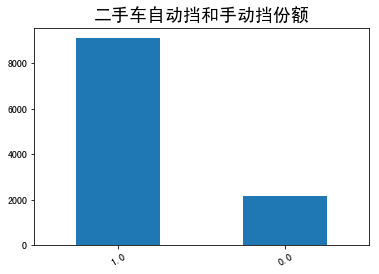

In [211]:
#可视化
car_type=after_data['type'].value_counts()
# car_type.plot(kind='pie',subplots=True, figsize=(6, 6), layout=(2, 2))
# plt.title('二手车自动挡和手动挡占比',fontsize=18)
car_type.plot(kind='bar',rot=30)
plt.title('二手车自动挡和手动挡份额',fontsize=18)

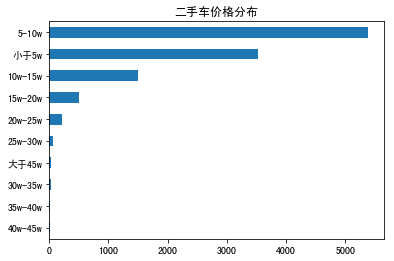

In [212]:
#二手车价格分布图
#连续数据离散化
label_level = ['小于5w','5-10w','10w-15w','15w-20w','20w-25w','25w-30w','30w-35w','35w-40w','40w-45w','大于45w']
price_level = [0,5,10,15,20,25,30,35,40,45,50]

price_cut = pd.cut(after_data['n_price'],labels=label_level,bins=price_level)

price_cut.value_counts()[::-1].plot(kind='barh',title='二手车价格分布')

In [213]:
after_data['brand'].value_counts().head(10)

日产        1122
大众        1061
丰田         820
本田         753
福特         752
现代         583
别克         521
大众POLO     470
雪佛兰        462
斯柯达        207
Name: brand, dtype: int64

Text(0.5,1,'二手车市场份额top10品牌分布')

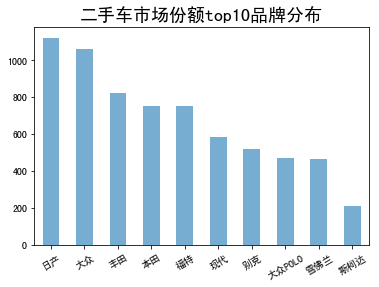

In [214]:
#二手车市场份额top10品牌分布
car_top10=after_data['brand'].value_counts().head(10)
car_top10.plot(kind='bar',rot=30,alpha=0.6)
plt.title('二手车市场份额top10品牌分布',fontsize=18)

In [215]:
top10={'brand':car_top10.index,'count':car_top10.values}
df_cars_top10=pd.DataFrame(top10,index=np.arange(1,11))
df_cars_top10

,brand,count
1,日产,1122
2,大众,1061
3,丰田,820
4,本田,753
5,福特,752
6,现代,583
7,别克,521
8,大众POLO,470
9,雪佛兰,462
10,斯柯达,207


In [221]:
after_data['age']=2021-after_data['buy_time']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [222]:
#top10品牌平均

group_by_brand=after_data.groupby(by=['brand'],sort=False).mean()
car_top10_index=['日产', '大众', '丰田', '本田', '福特', '现代', '别克', '大众POLO', '雪佛兰', '斯柯达']
# after_data.pivot_table(index='brand',values=['n_price','problem_num'], columns=['age'],aggfunc=np.mean)
#为分组后的df重建新的自增索引列
group_by_brand = group_by_brand.reset_index()

df_merage=pd.merge(df_cars_top10,group_by_brand)
df_merage

,brand,count,s_price,buy_time,km,oil,type,problem_num,new_sell_time,n_price,age
0,日产,1122,16.601346,2016.272727,5.568824,1.821301,0.922460,15.450089,2015.364528,9.881203,4.727273
1,大众,1061,13.527257,2015.194156,6.433280,1.592177,0.721018,18.155514,2014.298775,6.381819,5.805844
2,丰田,820,19.731390,2015.804878,6.083402,1.976585,0.978049,15.450000,2015.124390,12.512183,5.195122
3,本田,753,15.874821,2015.726428,6.289243,1.779814,0.929615,16.996016,2014.865870,9.906919,5.273572
4,福特,752,13.711928,2014.493351,7.216782,1.634441,0.823138,22.190160,2013.527926,5.348843,6.506649
5,现代,583,13.751098,2015.334477,6.289417,1.662093,0.845626,17.970840,2014.133791,6.597444,5.665523
6,别克,521,17.299251,2014.571977,7.029251,1.750288,0.848369,23.654511,2013.879079,6.176180,6.428023
7,大众POLO,470,10.739702,2015.606383,5.095362,1.500213,0.812766,17.900000,2014.951064,5.913957,5.393617
8,雪佛兰,462,11.764545,2014.781385,6.797792,1.560173,0.634199,19.926407,2014.374459,4.580801,6.218615
9,斯柯达,207,11.069275,2014.236715,6.673768,1.483092,0.850242,24.149758,2013.816425,4.903671,6.763285


Text(0.5,1,'二手车市场份额top10品牌平均价格')

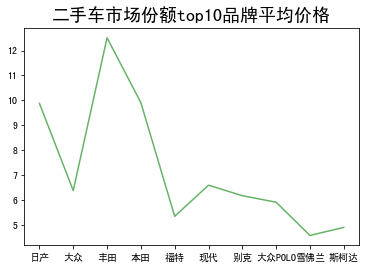

In [223]:
#top10品牌
plt.plot(df_merage['brand'].values,df_merage['n_price'].values,color='green',alpha=0.6)
plt.title('二手车市场份额top10品牌平均价格',fontsize=18)

In [224]:
df_merage['brand'].values

array(['日产', '大众', '丰田', '本田', '福特', '现代', '别克', '大众POLO', '雪佛兰', '斯柯达'],
      dtype=object)

Text(0.5,1,'二手车市场份额top10品牌异常问题平均数量')

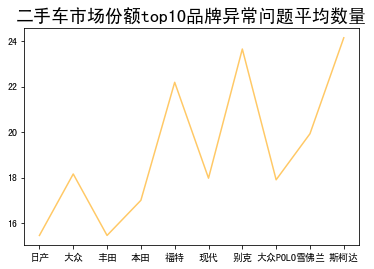

In [225]:
#top10品牌异常问题平均数量
plt.plot(df_merage['brand'].values,df_merage['problem_num'].values,color='orange',alpha=0.6)
plt.title('二手车市场份额top10品牌异常问题平均数量',fontsize=18)

Text(0.5,1,'二手车市场份额top10品牌平均贬值率')

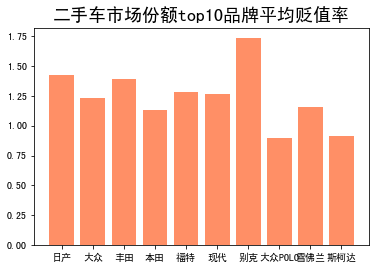

In [226]:
#平均贬值率最快的车
df_merage['devalue']=(df_merage['s_price']-df_merage['n_price'])/df_merage['age']
plt.bar(df_merage['brand'].values,df_merage['devalue'].values,color='orangered',alpha=0.6)
plt.title('二手车市场份额top10品牌平均贬值率',fontsize=18)

In [228]:
after_data['de_persent']=(after_data['s_price']-after_data['n_price'])/after_data['age']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [231]:
de_data=after_data

In [236]:
car_top10_index=['日产', '大众', '丰田', '本田', '福特', '现代', '别克', '大众POLO', '雪佛兰', '斯柯达']
# 筛选出top10品牌的折旧率
for item in car_top10_index:
    res=de_data.loc[de_data["brand"] == item]
    df=pd.concat([df,res],axis=0,ignore_index=True)
df

,name,s_price,buy_time,km,oil,type,city,brand,problem_num,new_sell_time,n_price,age,de_persent
0,斯柯达 晶锐 2012款 1.6L Scout,12.58,2012.0,5.62,1.6,1.0,beijing,斯柯达,21,2012.0,3.80,9.0,0.975556
1,斯柯达 明锐 2019款 1.5L 自动智行豪华版 国VI,13.77,2020.0,1.23,1.5,1.0,beijing,斯柯达,12,2019.0,8.50,1.0,5.270000
2,斯柯达 晶锐 2011款 1.6L 自动晶灵版,11.39,2011.0,8.34,1.6,1.0,beijing,斯柯达,49,2011.0,3.18,10.0,0.821000
3,斯柯达 晶锐 2014款 1.4L 自动晶致版,9.87,2014.0,6.94,1.4,1.0,beijing,斯柯达,29,2014.0,4.50,7.0,0.767143
4,斯柯达 晶锐 2017款 1.4L 自动车享版,9.22,2017.0,3.12,1.4,1.0,beijing,斯柯达,13,2017.0,6.30,4.0,0.730000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6953,斯柯达 晶锐 2011款 1.6L 自动晶灵版,11.39,2011.0,8.34,1.6,1.0,wuhan,斯柯达,49,2011.0,3.18,10.0,0.821000
6954,斯柯达 明锐 2019款 1.5L 自动舒适版,14.86,2019.0,3.14,1.5,1.0,wuhan,斯柯达,4,2019.0,8.58,2.0,3.140000
6955,斯柯达 晶锐 2017款 1.4L 自动车享版,9.22,2017.0,5.00,1.4,1.0,wuhan,斯柯达,24,2017.0,5.60,4.0,0.905000
6956,斯柯达 昕锐 2016款 1.4L 手动前行版,8.67,2016.0,7.20,1.4,0.0,wuhan,斯柯达,31,2016.0,4.28,5.0,0.878000


Text(0.5,1,'top10二手车贬值率箱线图')

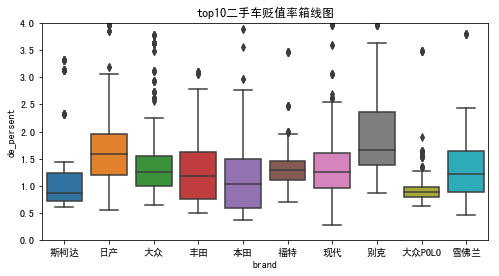

In [251]:
fig=plt.figure(figsize=(8,4))
de_price = df[['brand','de_persent']]
sns.boxplot(x='brand',y ='de_persent',data=de_price)
plt.ylim((0,4))
plt.title('top10二手车贬值率箱线图')

#### 以上可以看出受欢迎top10 中别克的贬值率整体相对最高，大众POLO的贬值率最低

(-2, 25)

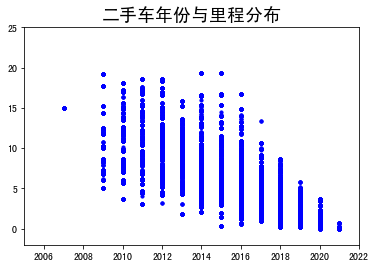

In [240]:
x=after_data['buy_time'].values
y=after_data['km'].values
plt.scatter(x,y,s=10,color='blue')
plt.title('二手车年份与里程分布',fontsize=18)
plt.xlim(2005, 2022)
plt.ylim(-2, 25)


In [ ]:
citys=after_data['city'].value_counts()

data_citys={'city':citys.index,'count':citys.values}
df_citys=pd.DataFrame(data_citys,index=np.arange(1,11))
df_citys

(-2, 90)

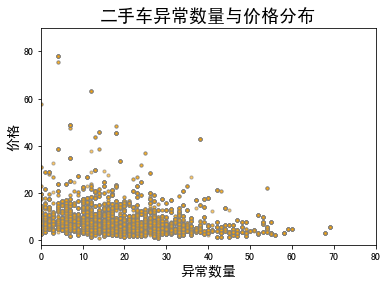

In [241]:
x=after_data['problem_num'].values
y=after_data['n_price'].values
plt.scatter(x,y,s=10,color='orange',edgecolor='gray',alpha=0.6)
plt.title('二手车异常数量与价格分布',fontsize=18)
plt.ylabel("价格", fontsize=14)
plt.xlabel("异常数量", fontsize=14)
plt.xlim(0, 80)
plt.ylim(-2, 90)

Text(0.5,1,'各城市二手车价格箱线图')

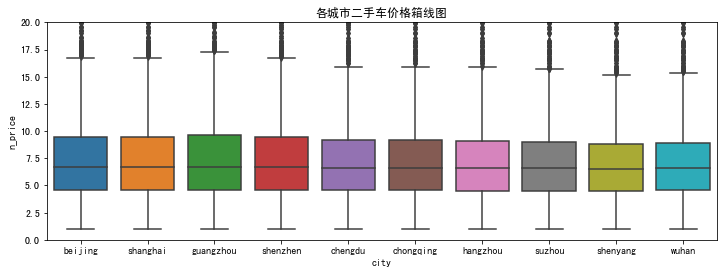

In [252]:
#各城市二手车价格箱线图
fig=plt.figure(figsize=(12,4))
price = after_data[['city','n_price']]
sns.boxplot(x='city',y ='n_price',data=price)
plt.ylim((0,20))
plt.title('各城市二手车价格箱线图')

### 整体来看各个热门城市包括一线二线城市的二手车价格分布基本持平，无明显差别，二手车价格和地域差别相关性不大

### 随机森林预测二手车价格，以及主要影响因素分析

In [243]:
import sklearn.linear_model as lm
import sklearn.metrics as sm
import sklearn.ensemble as se
import sklearn.utils as su

In [244]:
after_data

,name,s_price,buy_time,km,oil,type,city,brand,problem_num,new_sell_time,n_price,age,de_persent
2,斯柯达 晶锐 2012款 1.6L Scout,12.58,2012.0,5.62,1.6,1.0,beijing,斯柯达,21,2012.0,3.80,9.0,0.975556
4,丰田 YARiS L 致炫 2016款 改款 1.5E CVT魅动版,9.31,2018.0,1.94,1.5,1.0,beijing,丰田,11,2016.0,7.38,3.0,0.643333
6,大众 高尔夫 2016款 1.6L 自动时尚型,14.53,2016.0,1.20,1.6,1.0,beijing,大众,14,2016.0,8.80,5.0,1.146000
7,奔驰GLK级 2013款 GLK 300 4MATIC 动感天窗型,47.54,2014.0,6.47,3.0,1.0,beijing,奔驰GLK级,13,2013.0,20.28,7.0,3.894286
9,标致508 2013款 2.0L 两周年纪念 自动天窗经典版,19.72,2013.0,4.28,2.0,1.0,beijing,标致508,16,2013.0,6.60,8.0,1.640000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19313,日产 蓝鸟 2019款 1.6L 手动炫酷版 国V,12.36,2019.0,0.75,1.6,0.0,wuhan,日产,6,2019.0,7.50,2.0,2.430000
19314,雪佛兰 科沃兹 2019款 320 自动欣享天窗版,9.87,2019.0,1.05,1.5,1.0,wuhan,雪佛兰,9,2019.0,6.60,2.0,1.635000
19316,标致408 2014款 1.8L 自动豪华版,16.25,2015.0,7.08,1.8,1.0,wuhan,标致408,5,2014.0,6.27,6.0,1.663333
19318,雪佛兰 科鲁兹 2013款 1.8L SX AT,16.63,2013.0,11.29,1.8,1.0,wuhan,雪佛兰,29,2013.0,5.28,8.0,1.418750


In [245]:
foreast_data=after_data.drop(['city','brand'],axis=1)
foreast_data

,name,s_price,buy_time,km,oil,type,problem_num,new_sell_time,n_price,age,de_persent
2,斯柯达 晶锐 2012款 1.6L Scout,12.58,2012.0,5.62,1.6,1.0,21,2012.0,3.80,9.0,0.975556
4,丰田 YARiS L 致炫 2016款 改款 1.5E CVT魅动版,9.31,2018.0,1.94,1.5,1.0,11,2016.0,7.38,3.0,0.643333
6,大众 高尔夫 2016款 1.6L 自动时尚型,14.53,2016.0,1.20,1.6,1.0,14,2016.0,8.80,5.0,1.146000
7,奔驰GLK级 2013款 GLK 300 4MATIC 动感天窗型,47.54,2014.0,6.47,3.0,1.0,13,2013.0,20.28,7.0,3.894286
9,标致508 2013款 2.0L 两周年纪念 自动天窗经典版,19.72,2013.0,4.28,2.0,1.0,16,2013.0,6.60,8.0,1.640000
...,...,...,...,...,...,...,...,...,...,...,...
19313,日产 蓝鸟 2019款 1.6L 手动炫酷版 国V,12.36,2019.0,0.75,1.6,0.0,6,2019.0,7.50,2.0,2.430000
19314,雪佛兰 科沃兹 2019款 320 自动欣享天窗版,9.87,2019.0,1.05,1.5,1.0,9,2019.0,6.60,2.0,1.635000
19316,标致408 2014款 1.8L 自动豪华版,16.25,2015.0,7.08,1.8,1.0,5,2014.0,6.27,6.0,1.663333
19318,雪佛兰 科鲁兹 2013款 1.8L SX AT,16.63,2013.0,11.29,1.8,1.0,29,2013.0,5.28,8.0,1.418750


In [246]:
x=foreast_data[foreast_data.columns[1:-3]]
y=foreast_data['n_price']
x

,s_price,buy_time,km,oil,type,problem_num,new_sell_time
2,12.58,2012.0,5.62,1.6,1.0,21,2012.0
4,9.31,2018.0,1.94,1.5,1.0,11,2016.0
6,14.53,2016.0,1.20,1.6,1.0,14,2016.0
7,47.54,2014.0,6.47,3.0,1.0,13,2013.0
9,19.72,2013.0,4.28,2.0,1.0,16,2013.0
...,...,...,...,...,...,...,...
19313,12.36,2019.0,0.75,1.6,0.0,6,2019.0
19314,9.87,2019.0,1.05,1.5,1.0,9,2019.0
19316,16.25,2015.0,7.08,1.8,1.0,5,2014.0
19318,16.63,2013.0,11.29,1.8,1.0,29,2013.0


In [247]:

random_seed = 7  
x, y = su.shuffle(x, y, random_state=random_seed)
# 计算训练数据的数量
train_size = int(len(x) * 0.8) 
# 构建训练数据、测试数据
train_x = x[:train_size]  # 训练输入
test_x = x[train_size:]  # 测试输入,
train_y = y[:train_size]  # 训练输出
test_y = y[train_size:]  # 测试输出
# 创建随机森林回归器，并进行训练
#定义模型
model = se.RandomForestRegressor(max_depth=5,  # 最大深度
                                 n_estimators=800,  # 树数量
                                 min_samples_split=2)  # 最小样本数量，小于该数就不再划分子节点
model.fit(train_x, train_y)  # 训练


pre_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pre_test_y))  # 打印r2得分：0.9330998424764945

0.9326241071527585


In [248]:
#特征重要性
fi_dy = model.feature_importances_
fi_dy#array([6.01614883e-01, 1.28867735e-01, 1.89617465e-02, 1.39999034e-01,2.33227190e-04, 2.41494902e-02, 8.61738842e-02])

array([6.00171142e-01, 1.27849475e-01, 2.19002334e-02, 1.38307721e-01,
       2.02707380e-04, 2.48664243e-02, 8.67022973e-02])

[6.00171142e-01 1.38307721e-01 1.27849475e-01 8.67022973e-02
 2.48664243e-02 2.19002334e-02 2.02707380e-04]


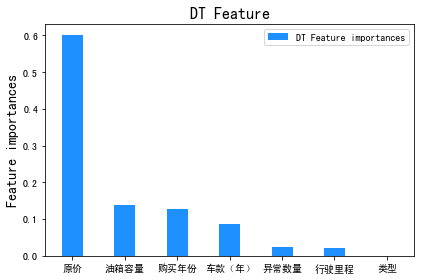

In [249]:
#特征重要性可视化
plt.figure("Feature importances")

plt.title("DT Feature", fontsize=16)
plt.ylabel("Feature importances", fontsize=14)
plt.grid(linestyle=":", axis=1)
feature_name=np.array(['原价','购买年份','行驶里程','油箱容量','类型','异常数量','车款（年）'])
x = np.arange(fi_dy.size)
sorted_idx = fi_dy.argsort()[::-1]  # 重要性排序(倒序)
fi = fi_dy[sorted_idx] #根据排序索引重新排特征值
print(fi)
plt.xticks(x, feature_name[sorted_idx])
plt.bar(x, fi, 0.4, color="dodgerblue", label="DT Feature importances")

plt.legend()
plt.tight_layout()

#### 以上可以看出主要影响二手车价格的因素为原价、油箱容量、购买年份